# step.0

In [1]:
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ결과기록ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# cluster number = 3일때 (0.60 0.79 0.83)  평균 0.74
# cluster number = 4일때 (0.79 0.43 0.83 0.83) 평균 0.72
# cluster number = 5일때 (0.43
# cluster number = 6일때 (0.92 0.79 0.58 0.83 0.54 0.98) 평균 0.7733
# cluster number = 7일때 (0.79 0.58 0.92 0.83 0.98 0.54 0.89(cv=4)) 평균 0.7899
# cluster number = 8일때 (0.98 0.67 0.79 0.83 0.92 0.97 0.54 0.89(cv=4)) 평균 0.8237
# cluster number = 9일때 (0.67 0.98 0.92 0.83 0.79 / (cv=4) 0.89 0.54 0.99 0.97  평균 0.8422
# cluster number = 10일때 (0.96 0.97 0.97 0.79 0.54 0.83 0.99 / (cv=4) 0.89 0.67 0.98) 평균 0.859

# cluster number = 4일때(degree=4) (0.05)
# cluster number = 5일때(degree=4) (0.45)
# cluster number = 6일때(degree=4) (0.99 0.76 0.58 0.97 0.89 0.99 )
# cluster number = 7일때(degree=4) (0.76 0.58 0.99 0.97 0.99 0.89 0.95)
# cluster number = 8일때(degree=4) (0.99 0.65 0.76 0.97 0.99 0.98 0.89 0.95)
# cluster number = 9일때(degree=4) (0.65 0.99 0.99 0.97 0.76
# cluster number = 10일때(degree=4) (0.98 0.97 0.96 0.76 0.92 0.94 0.99 0.99 0.65 0.99) 

# 모터끼리 묶음
# 3 0.73 0.91 0.98
# 4 0.95 0.96 0.96 0.49
# 5 0.48
# 6 0.98 0.98 0.96 0.54 0.96 0.98
# 7 
# 8 0.95 0.56 0.99 -3

# gridsearch 사용 
# 3 : 0.81 0.96 0.66
# 6 : 0.97 0.95 0.88 0.97 0.47 0.98
# 6 : 0.61 0.96 0.93 0.91 0.95 0.95
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [2]:
import pandas as pd
import numpy as np
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cv = 10
df = pd.read_csv("rawdata.csv")

#dataset = 'group_0.csv'  
#dataset = 'group_1.csv' 
dataset = 'group_2.csv'
#dataset = 'group_3.csv'  
#dataset = 'group_4.csv'   
#dataset = 'group_5.csv'
#dataset = 'group_6.csv'   
#dataset = 'group_7.csv'

dataset = pd.read_csv(dataset)
dataset.pop("Unnamed: 0")
dataset.pop("label")
print(dataset)

motor_name_lst=dataset["motor_name"]

dataset2 = pd.DataFrame()
collect_dataset = pd.DataFrame()
for i in range(len(motor_name_lst)):
    dataset2 = df.loc[df["P/No"]==motor_name_lst[i],:]
    #print(dataset2)
    collect_dataset = collect_dataset.append(dataset2,ignore_index=True) 

print(collect_dataset,"\n")
collect_dataset.drop(['P/No','Torque_division','shape_division'], axis = 1, inplace = True)

new_dataset = collect_dataset
print(new_dataset)

   max_Speed(RPM)  min_Speed(RPM)  max_Torque(kg.cm)  min_Torque(kg.cm)  \
0          1600.0           600.0               54.5               29.9   
1          1600.0           600.0               41.4               24.7   
2          1600.0           600.0               52.7               25.8   
3          1600.0           600.0               41.4               24.7   
4          1600.0           800.0               53.6               21.8   

   Coil Dia  Coil R  Coil Turn  Core Thick  Core Dia  Poles   motor_name  
0      0.85    7.60        180        60.0       130      6  EAU37067120  
1      0.90    5.25        138        60.0       130      6  EAU37067103  
2      0.85    7.60        180        60.0       130      6  EAU37067118  
3      0.90    5.25        138        60.0       130      6  EAU37067108  
4      0.90    5.48        144        60.0       130      6  EAU37067114  
           P/No  Watt  Speed(RPM)  Torque(kg.cm)  Coil Dia  Coil R  Coil Turn  \
0   EAU37067120   

# step.1

In [3]:
correlation_matrix = new_dataset.corr().round(2)
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
#print(mask,"\n")
mask[np.triu_indices_from(mask)] = True
#print(mask)

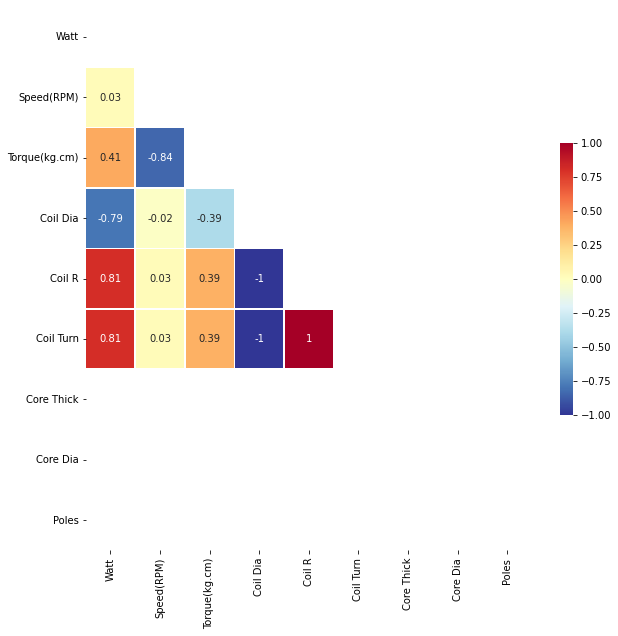

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

In [5]:
import matplotlib
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
 
matplotlib.rcParams['axes.unicode_minus'] = False
#X = pd.DataFrame(np.c_[new_dataset['Torque(kg.cm)'], new_dataset['Coil Dia'], new_dataset['Coil R'], new_dataset['Coil Turn'], new_dataset['Core Thick'], new_dataset['Core Dia'], new_dataset['Poles']], columns = ['Torque(kg.cm)','Coil Dia', 'Coil R', 'Coil Turn', 'Core Thick','Core Dia','Poles'])
X = pd.DataFrame(np.c_[new_dataset['Torque(kg.cm)'], new_dataset['Coil Dia'], new_dataset['Coil R'], new_dataset['Coil Turn'], new_dataset['Core Thick'], new_dataset['Core Dia'], new_dataset['Poles']], columns = ['Torque(kg.cm)','Coil Dia', 'Coil R', 'Coil Turn', 'Core Thick','Core Dia','Poles'])
Y = new_dataset['Speed(RPM)']
RANDOM_SEED = 5
SPLIT_SIZE = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = SPLIT_SIZE, random_state=RANDOM_SEED)

# print(X,"\n")
# print(Y,"\n")
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)
# print(Y_train.values)

# step.2

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

#### gridsearch로 fit할 경우

In [7]:
# pipeline 정의
# - 데이터 전처리하는 단일개체 또는 분류의 모든 단계를 포함하는 단일 개체 생성 가능
sc = StandardScaler()
sc2 = MinMaxScaler()
poly_features = PolynomialFeatures(include_bias=False)
pipe_linear = Pipeline([
                ('scaler', sc),
                ('poly', poly_features),
                ('fit', LinearRegression())])
grid_params_linear = [{
        "poly__degree" : np.arange(1,4), 
        "fit__fit_intercept" : [True, False],
}]
# 위에서 정의한 pipe_linear와 grid_params_linear를 gridsearch에 사용
GSCV = GridSearchCV(pipe_linear, grid_params_linear, 
                      scoring = "neg_mean_squared_error",
                      cv=cv)

print(grid_params_linear)
print(GSCV)


[{'poly__degree': array([1, 2, 3]), 'fit__fit_intercept': [True, False]}]
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('fit', LinearRegression())]),
             param_grid=[{'fit__fit_intercept': [True, False],
                          'poly__degree': array([1, 2, 3])}],
             scoring='neg_mean_squared_error')


<AxesSubplot:xlabel='Speed(RPM)'>

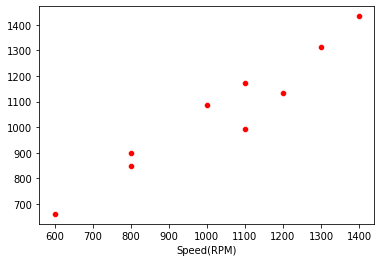

In [8]:
GSCV.fit(X_train, Y_train.values.ravel()) # Y_train은 values값을 1차원배열로 변환
prediction=GSCV.predict(X_test)
sns.scatterplot(x=Y_test,y=prediction,color="red")

R2 score is 0.913510511500576
Rmse_loss is 72.03727722481906




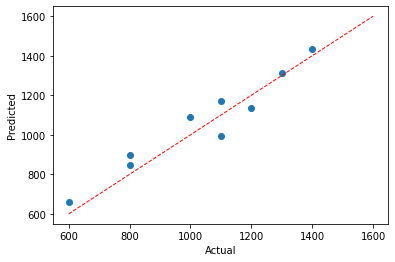

In [9]:
r2square = r2_score(Y_test,prediction)
mse_loss = mean_squared_error(Y_test,prediction)
Rmse_loss = np.sqrt(mse_loss)

# print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2square))
print('Rmse_loss is {}'.format(Rmse_loss))
print("\n")
fig, ax = plt.subplots()
ax.scatter(Y_test, prediction)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()

In [10]:
#print(Y_test)
#print(prediction)
dif = abs(Y_test-prediction)
print("그룹3의 RPM값\n",dif)

print("|실제값-예측값|의 최대값 ",np.max(dif))
print("|실제값-예측값|의 최소값 ",np.min(dif))
print("|실제값-예측값|의 평균값 ",np.mean(dif))

#print(Y)
#print(np.max(prediction))
#print(np.min(prediction))

# |실제값-예측값| = (최대값,최소값,평균)

그룹3의 RPM값
 28     33.435590
23     73.458291
25     99.186488
3      65.608160
24     88.765030
6      49.812993
4     108.204028
36     61.537329
29     13.869214
Name: Speed(RPM), dtype: float64
|실제값-예측값|의 최대값  108.20402821458072
|실제값-예측값|의 최소값  13.869214341620136
|실제값-예측값|의 평균값  65.98634704786053
